In [1]:
homicides_all = read.csv("data/homicide_suicide (outcome)/cdc_homicide_all.csv")
homicides_firearm = read.csv("data/homicide_suicide (outcome)/cdc_homicide_firearm.csv")
suicides_all = read.csv("data/homicide_suicide (outcome)/cdc_suicide_all.csv")
suicides_firearm = read.csv("data/homicide_suicide (outcome)/cdc_suicide_firearm.csv")

df = read.csv("data/matching-data.csv")
df = df[seq(from = 1, to = nrow(df), by = 12),]

head(df)

,X,state,year,month,total_pop,young_males..15.34.yrs.,ethanol_all_drinks_gallons_per_capita,total_gdp..Millions.of.current.dollars.,Urban.population.percentage,gun_totals
1,0,Alabama,1997,1,4367935,623964,1.82,104087.4,NA,NA
13,12,Alaska,1997,1,612968,93769,2.56,25744.8,NA,NA
25,24,Arizona,1997,1,4736990,725687,2.44,132418.0,NA,NA
37,36,Arkansas,1997,1,2601090,367164,1.71,59865.6,NA,NA
49,48,California,1997,1,32486010,5101908,2.28,1070523.6,NA,NA
61,60,Colorado,1997,1,4018293,622249,2.48,136675.3,NA,NA


In [2]:
homicidesdf = aggregate(homicides_all$Deaths, by = list(State = homicides_all$State, Year = homicides_all$Year), FUN = sum)
colnames(df)[2:3] = c("State", "Year")
fulldf = merge(df, homicidesdf, by = c("State", "Year"), all = TRUE)
fulldf = fulldf[complete.cases(fulldf[,c("State","Year","x","total_pop")]),]
fulldf$homiciderate = 100000*fulldf$x / fulldf$total_pop
fulldf$youngmalesrate = fulldf$young_males..15.34.yrs./fulldf$total_pop
fulldf$gdppercapita = fulldf$total_gdp..Millions.of.current.dollars./fulldf$total_pop
fulldf$gunspercapita = fulldf$gun_totals/fulldf$total_pop


x = as.character(unique(fulldf$State))
stateid = numeric(0)
for (i in 1:nrow(fulldf)){
    stateid[i] = which(x == fulldf$State[i])}
fulldf$stateid = stateid

mappinghomicidesall = numeric(0)
for (i in unique(homicides_all$State)){
    argfirst = (min(which(homicides_all$State == i)))
    mappinghomicidesall[i] = (homicides_all$State.Code[argfirst])
}

In [3]:
fulldf$stateid = mappinghomicidesall[fulldf$State]
fulldf = fulldf[!is.na(fulldf$stateid), ]
head(fulldf)

,State,Year,X,month,total_pop,young_males..15.34.yrs.,ethanol_all_drinks_gallons_per_capita,total_gdp..Millions.of.current.dollars.,Urban.population.percentage,gun_totals,x,homiciderate,youngmalesrate,gdppercapita,gunspercapita,stateid
3,Alabama,1999,1224,1,4430141,617720.0,1.87,115030.9,NA,18049,442,9.977109,0.1394357,0.02596552,0.004074137,1
4,Alabama,2000,1836,1,4447100,596244.2,1.88,119242.4,55.4,17860,440,9.894088,0.1340748,0.02681352,0.004016100,1
5,Alabama,2001,2448,1,4467634,612272.0,1.86,122449.3,NA,17733,431,9.647164,0.1370461,0.02740809,0.003969215,1
6,Alabama,2002,3060,1,4480089,612065.0,1.92,127792.3,NA,18235,419,9.352493,0.1366189,0.02852450,0.004070232,1
7,Alabama,2003,3672,1,4503491,615304.0,1.90,133739.2,NA,19179,438,9.725788,0.1366282,0.02969678,0.004258696,1
8,Alabama,2004,4284,1,4530729,616558.0,1.91,146524.7,NA,20486,369,8.144385,0.1360836,0.03234020,0.004521568,1


In [4]:
fulldf = fulldf[fulldf$stateid != 2 & fulldf$stateid != 8 & fulldf$stateid != 14 & fulldf$stateid != 24 & fulldf$stateid != 37,]

mappingarg = numeric(0)
for (i in fulldf$State){
    arg = which(unique(fulldf$State) == i)
    mappingarg = c(mappingarg, arg)
}

fulldf$stateid = mappingarg


In [5]:
fulldf$State = as.character(fulldf$State)
str(fulldf)

'data.frame':	449 obs. of  16 variables:
 $ State                                  : chr  "Alabama" "Alabama" "Alabama" "Alabama" ...
 $ Year                                   : int  1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 ...
 $ X                                      : int  1224 1836 2448 3060 3672 4284 4896 5508 6120 6732 ...
 $ month                                  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ total_pop                              : int  4430141 4447100 4467634 4480089 4503491 4530729 4442558 4599030 4627851 4661900 ...
 $ young_males..15.34.yrs.                : num  617720 596244 612272 612065 615304 ...
 $ ethanol_all_drinks_gallons_per_capita  : num  1.87 1.88 1.86 1.92 1.9 1.91 1.91 1.95 2 2.01 ...
 $ total_gdp..Millions.of.current.dollars.: num  115031 119242 122449 127792 133739 ...
 $ Urban.population.percentage            : num  NA 55.4 NA NA NA NA NA NA NA NA ...
 $ gun_totals                             : int  18049 17860 17733 18235 19179 20486 19735 215

In [11]:
fulldf

,State,Year,X,month,total_pop,young_males..15.34.yrs.,ethanol_all_drinks_gallons_per_capita,total_gdp..Millions.of.current.dollars.,Urban.population.percentage,gun_totals,x,homiciderate,youngmalesrate,gdppercapita,gunspercapita,stateid
3,Alabama,1999,1224,1,4430141,617720.0,1.87,115030.9,NA,18049,442,9.977109,0.1394357,0.02596552,0.004074137,1
4,Alabama,2000,1836,1,4447100,596244.2,1.88,119242.4,55.4,17860,440,9.894088,0.1340748,0.02681352,0.004016100,1
5,Alabama,2001,2448,1,4467634,612272.0,1.86,122449.3,NA,17733,431,9.647164,0.1370461,0.02740809,0.003969215,1
6,Alabama,2002,3060,1,4480089,612065.0,1.92,127792.3,NA,18235,419,9.352493,0.1366189,0.02852450,0.004070232,1
7,Alabama,2003,3672,1,4503491,615304.0,1.90,133739.2,NA,19179,438,9.725788,0.1366282,0.02969678,0.004258696,1
8,Alabama,2004,4284,1,4530729,616558.0,1.91,146524.7,NA,20486,369,8.144385,0.1360836,0.03234020,0.004521568,1
9,Alabama,2005,4896,1,4442558,585616.0,1.91,155970.4,NA,19735,435,9.791656,0.1318196,0.03510824,0.004442261,1
10,Alabama,2006,5508,1,4599030,623648.0,1.95,163853.6,NA,21531,448,9.741185,0.1356042,0.03562786,0.004681639,1
11,Alabama,2007,6120,1,4627851,623678.0,2.00,169678.4,NA,22107,483,10.436810,0.1347662,0.03666462,0.004776947,1
12,Alabama,2008,6732,1,4661900,631696.0,2.01,172686.8,NA,22516,459,9.845771,0.1355018,0.03704215,0.004829790,1


In [12]:

dataprep.out = dataprep(foo = fulldf,
                        predictors= c("ethanol_all_drinks_gallons_per_capita", "youngmalesrate", "gdppercapita", "gunspercapita"),
                        predictors.op = c("mean"),
                        dependent = c("homiciderate"),
                        unit.variable = c("stateid"),
                        time.variable = c("Year"),
                        treatment.identifier = 10,
                        controls.identifier = c(1:9, 11:30),
                        time.predictors.prior = c(1999:2004),
                        time.optimize.ssr = c(1999:2004),
                        unit.names.variable = c("State"),
                        time.plot = c(1999:2014))


ERROR: Error in dataprep(foo = fulldf, predictors = c("ethanol_all_drinks_gallons_per_capita", : 
 Your panel, as described by unit.variable and time.variable, is unbalanced. Balance it and run again.



In [729]:
synth.out = synth(data.prep.obj = dataprep.out)
synth.tables = synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.3468506 

solution.v:
 0.3121271 0.3544422 0.121813 0.2116178 

solution.w:
 0.02892259 0.008962436 0.03671814 0.005114431 0.2083111 0.01594338 0.07440669 0.01334013 0.01139194 0.01523796 0.01865158 0.1530075 0.0146297 0.01255583 0.008551076 0.01543835 0.01151873 0.1082895 0.01623272 0.001546774 0.01030482 0.01918235 0.009552198 0.01599251 0.01530572 0.02464318 0.01527061 0.02096345 0.01411881 0.02044749 0.007339846 0.01267955 0.01113286 0.01450211 0.009793951 



In [730]:
synth.tables$tab.w

,w.weights,unit.names,unit.numbers
1,0.029,Alabama,1
2,0.009,Arizona,2
3,0.037,Arkansas,3
4,0.005,California,4
5,0.208,Colorado,5
6,0.016,Connecticut,6
7,0.074,District of Columbia,7
8,0.013,Florida,8
9,0.011,Georgia,9
11,0.015,Indiana,11


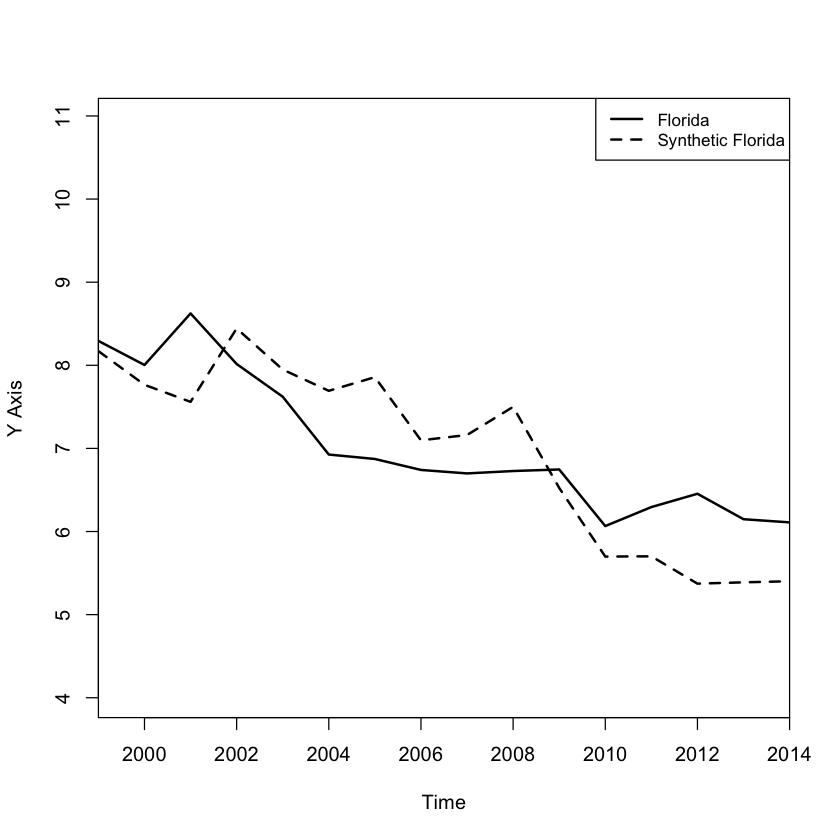

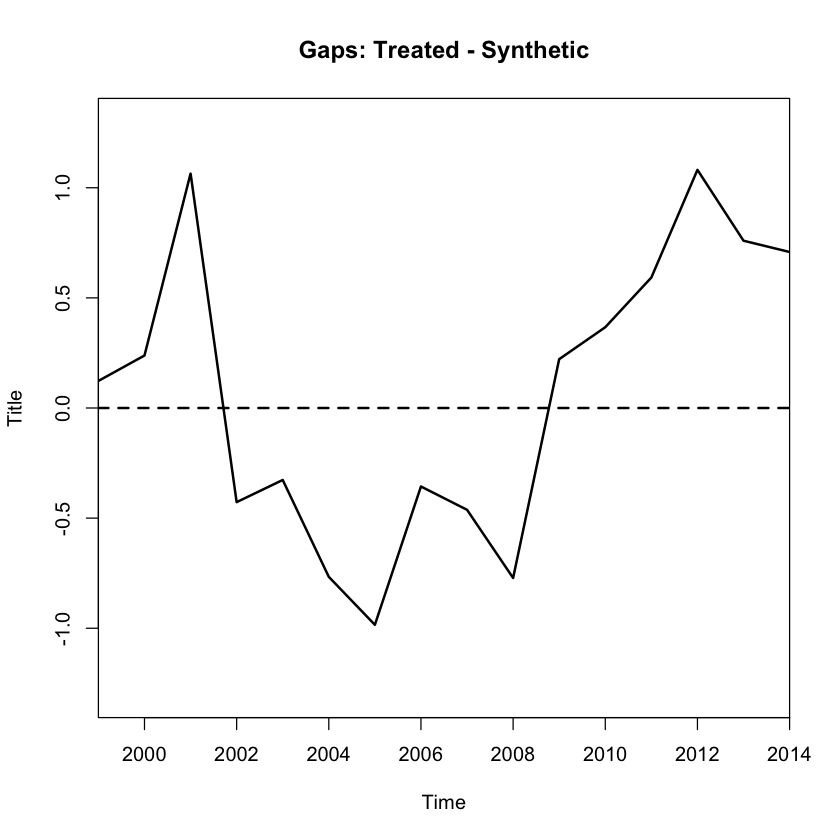

In [732]:
path.plot(synth.res = synth.out, dataprep.res = dataprep.out, Legend = c("Florida", "Synthetic Florida"))
gaps.plot(synth.res = synth.out, dataprep.res = dataprep.out)
